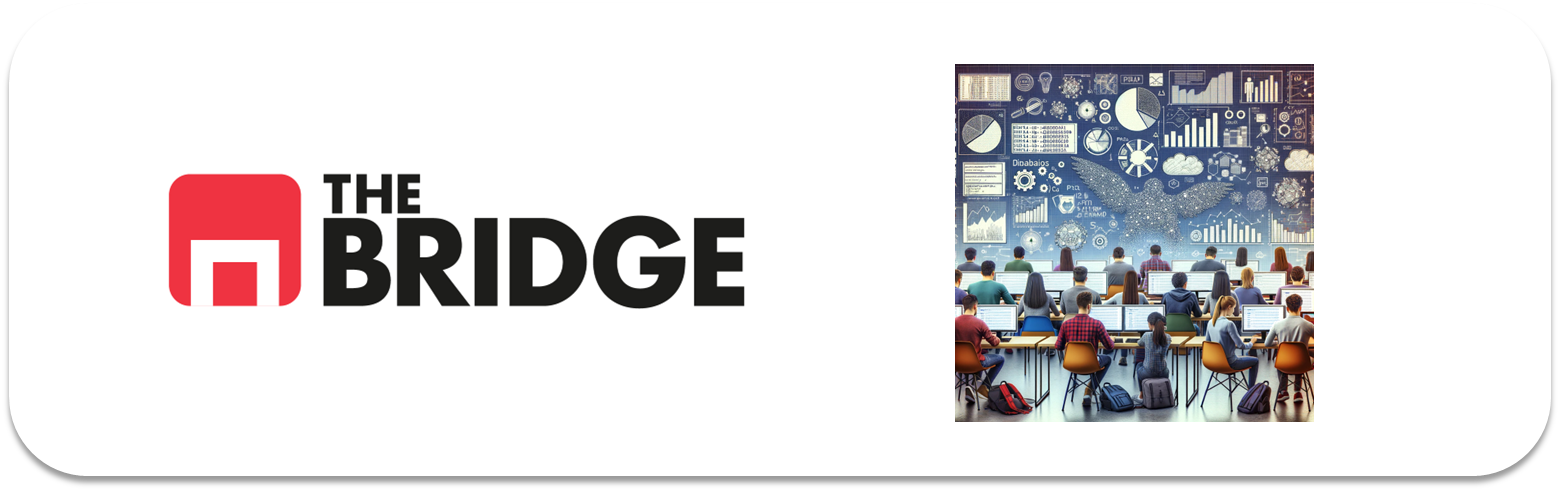

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import ElasticNet

In [16]:
#1

In [43]:
df = pd.read_csv('./data/obligatoria_hard.csv', sep = '|')

In [36]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


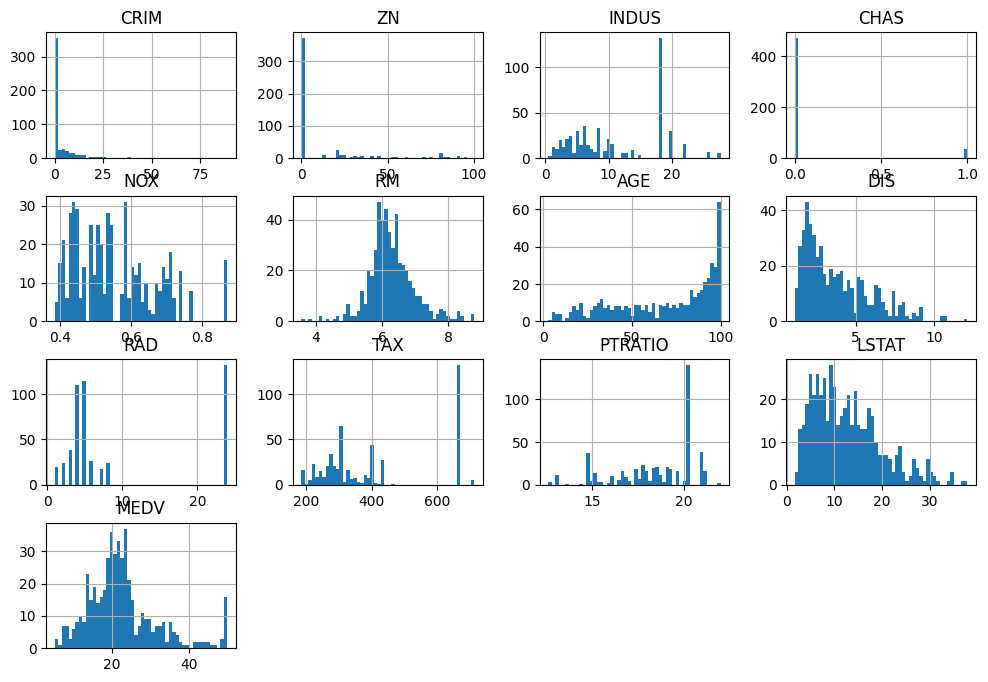

In [10]:
df.hist(bins=50, figsize=(12,8));

In [17]:
#2

In [13]:
df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

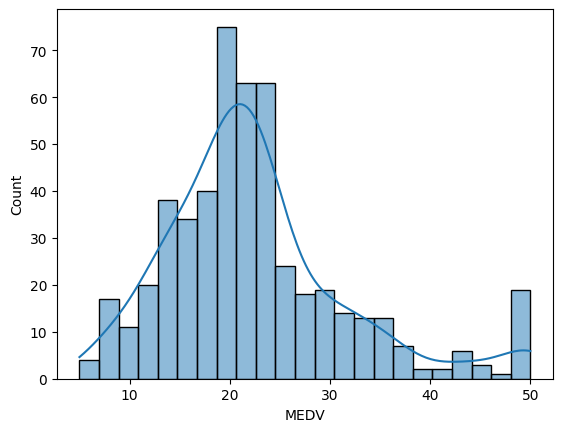

In [37]:
sns.histplot(df['MEDV'], kde=True);

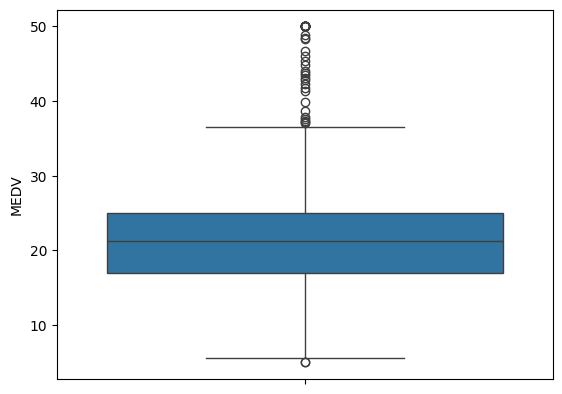

In [45]:
sns.boxplot(df['MEDV']);

In [18]:
#3

In [46]:
df.rename(columns={'MEDV':'target'}, inplace=True)

In [47]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [48]:
print(train_set.shape)
print(test_set.shape)

(404, 13)
(102, 13)


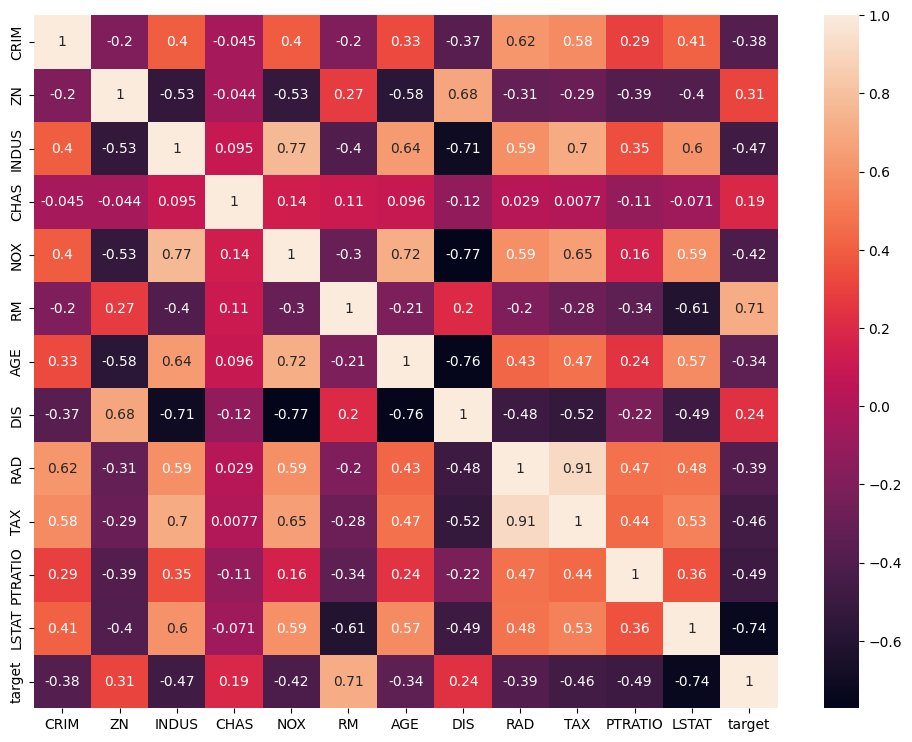

In [49]:
plt.figure(figsize=(12,9))
sns.heatmap(train_set.corr(), annot=True);

In [50]:
features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

Estas features he escogido por lo que se ve en las gráfica de correlación y conociendo la población del país,\
la tasa de criminaliad es importante para la ubicacion de la casa, si hay negocios o no también suele afectar, la concentración de óxidos de nitrógeno es importante para la salud, así que es importante para determinar el precio, la cantidad de impuestos que tendrás que pagar afectará al precio de la casa, sabiendo el estatus socioeconómico de los vecinos te puedes hacer una idea del nivel de barrio, el precio se verá afectado.

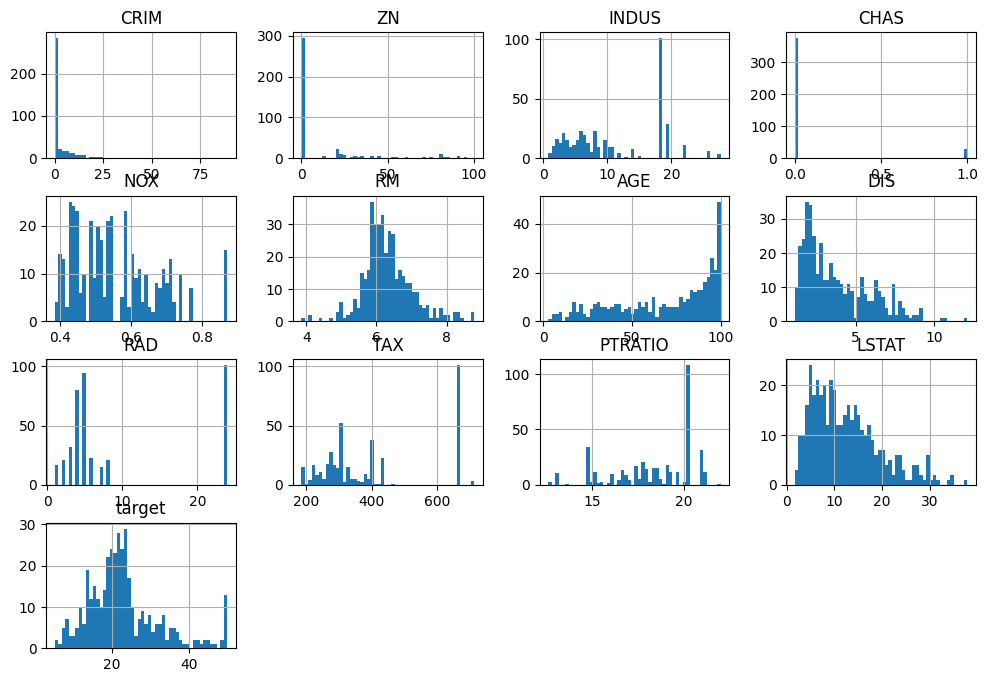

In [57]:
train_set.hist(bins=50, figsize=(12,8));

In [32]:
#4

In [60]:
X_train = train_set.drop(columns='target')
y_train = train_set['target']

X_test = test_set.drop(columns = 'target')
y_test = test_set['target']

In [66]:
# lo escalamos para que los valores de media esten cercanos a 0 y la desviación estandar a -1

In [62]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train[features]), columns= features)
X_test = pd.DataFrame(scaler.transform(X_test[features]), columns= features)

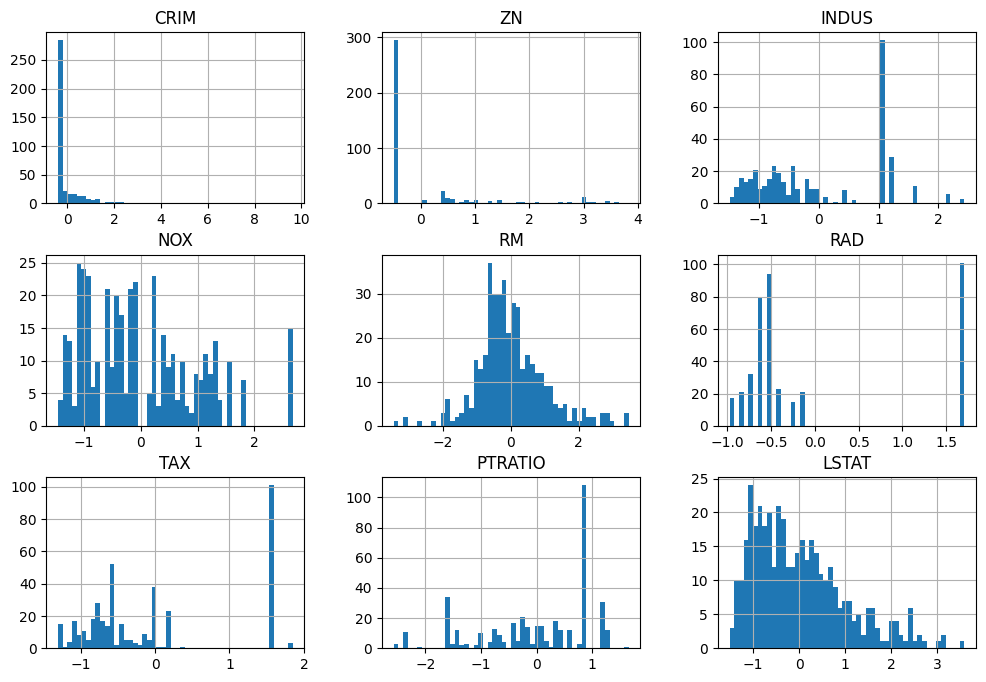

In [64]:
X_train.hist(bins=50, figsize=(12,8));

In [68]:
X_train.describe()

,CRIM,ZN,INDUS,NOX,RM,RAD,TAX,PTRATIO,LSTAT
count,4.040000e+02,404.000000,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-2.638154e-17,0.000000,-4.177077e-17,-5.111423e-16,-2.616169e-16,-9.453384e-17,-1.516938e-16,8.519038e-16,-1.791746e-16
std,1.001240e+00,1.001240,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.061414e-01,-0.500320,-1.487791e+00,-1.458711e+00,-3.461733e+00,-9.740476e-01,-1.307684e+00,-2.568944e+00,-1.510559e+00
25%,-3.979761e-01,-0.500320,-8.502733e-01,-8.887828e-01,-6.003488e-01,-6.243599e-01,-7.533563e-01,-6.821011e-01,-8.005057e-01
50%,-3.776748e-01,-0.500320,-3.521669e-01,-1.572334e-01,-1.494427e-01,-5.077973e-01,-4.460660e-01,1.714705e-01,-2.157763e-01
75%,-4.582119e-02,0.364589,1.033237e+00,6.338607e-01,4.528240e-01,3.081406e-01,1.578434e+00,8.453428e-01,5.513070e-01
max,9.630689e+00,3.824227,2.433163e+00,2.675394e+00,3.477564e+00,1.706891e+00,1.849573e+00,1.653990e+00,3.592534e+00


In [69]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# pesos

In [70]:
feat_coef = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['standarizados']).sort_values('standarizados', ascending =False)
feat_coef

,standarizados
RM,3.484613
RAD,2.061511
INDUS,0.938309
ZN,-0.464065
NOX,-0.776511
CRIM,-0.948110
TAX,-1.921588
PTRATIO,-2.247439
LSTAT,-3.786985


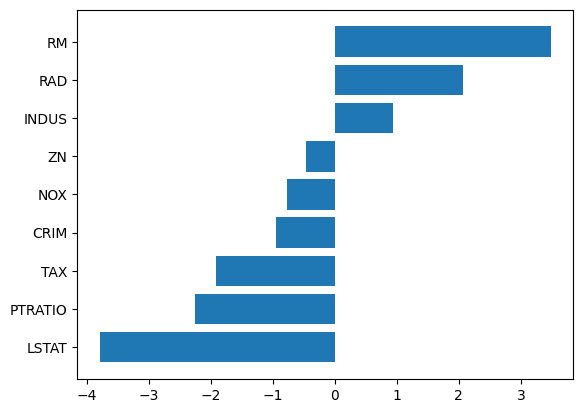

In [71]:
x = feat_coef.sort_values('standarizados')
plt.barh(x.index, x.standarizados);

In [72]:
predicciones = lin_reg.predict(X_test)

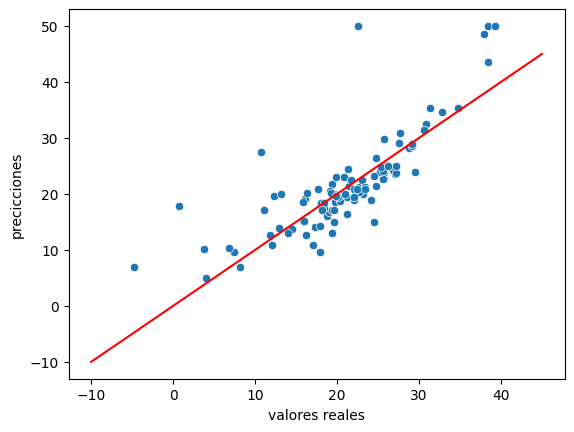

In [84]:
sns.scatterplot(x=predicciones, y=y_test)
plt.plot([-10,45],[-10,45], 'r')
plt.xlabel('valores reales')
plt.ylabel('precicciones');

In [80]:
#train error
pred_train = lin_reg.predict(X_train)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lin_reg.score(X_train, y_train))

MAE train 3.593126895859533
RMSE train 5.079790964030916
R2 train 0.7029669024150674


In [81]:
# test error
pred_test = lin_reg.predict(X_test)
print('MAE test', metrics.mean_absolute_error(y_test, pred_test))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print('R2 test', lin_reg.score(X_test, y_test))

MAE test 3.304474164995292
RMSE test 5.186642180476822
R2 test 0.6331669259515823


Parece que el modelo funciona bien, el R2 en train es de 0.70 y en test es de 0.63, es decir el 63% son a través de datos predecidos, hay una diferencia entre el train error y el test error, pero no es mucha la diferencia, no hay overfitting.

In [86]:
elastic_net = ElasticNet(alpha = 0.2, l1_ratio = 0.7)
elastic_net.fit(X_train, y_train)

print('Train MAE sin regularizacion:', metrics.mean_squared_error(y_train, lin_reg.predict(X_train)))
print('Train RMSE sin regularizacion:', np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_train))))
print('Train R2 sin regularizacion:', lin_reg.score(X_train, y_train))
print('Test MAE sin regularizacion:', metrics.mean_absolute_error(y_test, lin_reg.predict(X_test)))
print('Test RMSE sin regularizacion:', np.sqrt(metrics.mean_squared_error(y_test, lin_reg.predict(X_test))))
print('Test R2 sin regularizacion:', lin_reg.score(X_test, y_test))
print('\n')
print('Train MAE:', metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, elastic_net.predict(X_train))))
print('Train R2:', elastic_net.score(X_train, y_train))
print('Test MAE:', metrics.mean_absolute_error(y_test, elastic_net.predict(X_test)))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elastic_net.predict(X_test))))
print('Test R2:', elastic_net.score(X_test, y_test))

Train MAE sin regularizacion: 25.804276238250136
Train RMSE sin regularizacion: 5.079790964030916
Train R2 sin regularizacion: 0.7029669024150674
Test MAE sin regularizacion: 3.304474164995292
Test RMSE sin regularizacion: 5.186642180476822
Test R2 sin regularizacion: 0.6331669259515823


Train MAE: 26.80208739524617
Train RMSE: 5.177073246076993
Train R2: 0.6914810953329062
Test MAE: 3.3787879821961457
Test RMSE: 5.262567855659275
Test R2: 0.6223484014881375


In [110]:
elastic_net = ElasticNet(alpha = 0.01, l1_ratio = 1)
elastic_net.fit(X_train, y_train)

print('Train MAE sin regularizacion:', metrics.mean_squared_error(y_train, lin_reg.predict(X_train)))
print('Train RMSE sin regularizacion:', np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_train))))
print('Train R2 sin regularizacion:', lin_reg.score(X_train, y_train))
print('Test MAE sin regularizacion:', metrics.mean_absolute_error(y_test, lin_reg.predict(X_test)))
print('Test RMSE sin regularizacion:', np.sqrt(metrics.mean_squared_error(y_test, lin_reg.predict(X_test))))
print('Test R2 sin regularizacion:', lin_reg.score(X_test, y_test))
print('\n')
print('Train MAE:', metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, elastic_net.predict(X_train))))
print('Train R2:', elastic_net.score(X_train, y_train))
print('Test MAE:', metrics.mean_absolute_error(y_test, elastic_net.predict(X_test)))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elastic_net.predict(X_test))))
print('Test R2:', elastic_net.score(X_test, y_test))

Train MAE sin regularizacion: 25.804276238250136
Train RMSE sin regularizacion: 5.079790964030916
Train R2 sin regularizacion: 0.7029669024150674
Test MAE sin regularizacion: 3.304474164995292
Test RMSE sin regularizacion: 5.186642180476822
Test R2 sin regularizacion: 0.6331669259515823


Train MAE: 25.80976407212256
Train RMSE: 5.080331098670889
Train R2: 0.7029037319436654
Test MAE: 3.3053835908978595
Test RMSE: 5.191770279999033
Test R2: 0.6324411822399354


In [107]:
elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.7)
elastic_net.fit(X_train, y_train)

print('Train MAE sin regularizacion:', metrics.mean_squared_error(y_train, lin_reg.predict(X_train)))
print('Train RMSE sin regularizacion:', np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_train))))
print('Train R2 sin regularizacion:', lin_reg.score(X_train, y_train))
print('Test MAE sin regularizacion:', metrics.mean_absolute_error(y_test, lin_reg.predict(X_test)))
print('Test RMSE sin regularizacion:', np.sqrt(metrics.mean_squared_error(y_test, lin_reg.predict(X_test))))
print('Test R2 sin regularizacion:', lin_reg.score(X_test, y_test))
print('\n')
print('Train MAE:', metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, elastic_net.predict(X_train))))
print('Train R2:', elastic_net.score(X_train, y_train))
print('Test MAE:', metrics.mean_absolute_error(y_test, elastic_net.predict(X_test)))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elastic_net.predict(X_test))))
print('Test R2:', elastic_net.score(X_test, y_test))

Train MAE sin regularizacion: 25.804276238250136
Train RMSE sin regularizacion: 5.079790964030916
Train R2 sin regularizacion: 0.7029669024150674
Test MAE sin regularizacion: 3.304474164995292
Test RMSE sin regularizacion: 5.186642180476822
Test R2 sin regularizacion: 0.6331669259515823


Train MAE: 29.936044831051642
Train RMSE: 5.471384178711237
Train R2: 0.6554061023254776
Test MAE: 3.483304430338082
Test RMSE: 5.285117062538121
Test R2: 0.6191051223463354


Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?

He usado el ElasticNet, para tener un poco de los dos, la conclusión es que el modelo ya funciona bien, ya que con las regularizaciones no consigo nada de mejora, el que mejor funciona es con alpha de 0.01, es decir casi nada de regularización, esto es porque los datos ya están bien, los otros dos ejemplos dan un MAE mas alto, necesitamos un MAE mas bajo posible, con el RMSE pasa lo mismo, nos da un valor más alto, y lo necesitamos más bajo posible, y el R2 nos da un 0.63, es una valor que es mayor a 0.6, es decir ya va bien para el modelo.